In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
#print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

In [2]:
# Importing the boston price dataset
from sklearn.datasets import load_boston
boston = load_boston()
# Let's make a pandas dataframe with the data
data = pd.DataFrame(boston.data, columns= boston.feature_names)
data['Target']= boston.target

In [3]:
# A look at the data
data.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
#checking for any missing values 
data.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Target     0
dtype: int64

In [5]:
# Let's standardize our data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data = scaler.fit_transform(data)



In [6]:
X = data[:,:13]
y = data[:,13]

In [7]:
# Let's do simple regression first
from sklearn.linear_model import LinearRegression
reg1 = LinearRegression()
reg1.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [8]:
# Looking at the coefficients or weights from simple linear regression
reg1_weights = reg1.coef_
reg1_weights

array([-0.10101708,  0.1177152 ,  0.0153352 ,  0.07419883, -0.22384803,
        0.29105647,  0.00211864, -0.33783635,  0.28974905, -0.22603168,
       -0.22427123,  0.09243223, -0.40744693])

In [9]:
#Now implementing stochastic gradient descent

# Assuming the loss function to be L, error e and weights w, we can define the loss function differential with respect to w as

def dl_dw(X,err,w):
    return -2*(X.T).dot(err)/len(X)

# Now for sgd, 

def sgd(learning_rate= 0.001, epochs= 150, batch= 5, decay= 0.9): #experimenting with learning_rate and epochs may give more better results
    number_of_epoch_runs = int(len(X)/batch)
    
    # starting initially with random weights and loss
    w = np.zeros((13, 1))
    parameters = []
    loss = np.zeros((epochs,1))
    
    for i in range(epochs):
        parameters.append(w)
        
        for j in range(number_of_epoch_runs):
            idx = np.random.choice(len(X),batch, replace = False)
            err = y[idx] - X[idx].dot(w)
            
            #then updating our parameters
            w = w - (learning_rate)* dl_dw(X[idx],err,w)
            
        loss[i] = np.sum(np.square(err))/len(err)
        # We also deacy the learning rate as it progresses
        learning_rate = learning_rate * decay
        w
    
    return parameters, loss, w

parameters, loss, w = sgd()

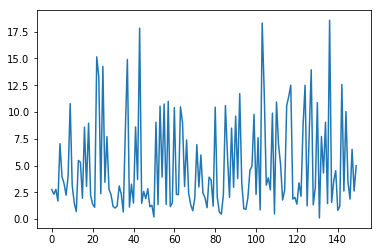

In [10]:
import matplotlib.pyplot as plt
plt.plot(loss)

In [11]:
# Getting the weights
reg2_weights = w[:,-1]

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


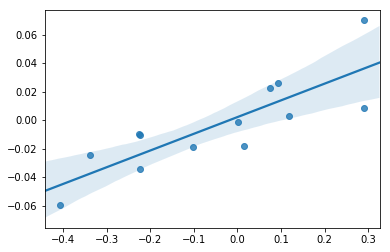

In [12]:
# plotting the comparison between two models
import seaborn as sns
sns.regplot(reg1_weights, reg2_weights)